Compare a single cast from IOS observations to model.

IOS observations span many years. So, compare observations with model on day of, 7 days before and 7 days after. This can account for spring/neap variability but not interannual variabilty in discharge, winds, etc

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ACTDR
import netCDF4 as nc
from salishsea_tools import viz_tools
import numpy as np
import datetime
from salishsea_tools import tidetools

import comparisons

%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
paths = {'nowcast': '/data/dlatorne/MEOPAR/SalishSea/nowcast/',
        'spinup': '/ocean/dlatorne/MEOPAR/SalishSea/results/spin-up/'}


In [4]:
ACTDR.load_dat('SOG_2000.dat')

> open  SOG_2000.dat
> load CTD_DAT
> load STANDARD_KEYS
> close  SOG_2000.dat
> complete


In [5]:
data = pd.DataFrame(ACTDR.CTD_DAT)

lon_min=-123.1; lat_min=48.5;
lon_max=-123; lat_max=48.8;

data_region = comparisons.isolate_region(data, lon_min, lon_max, lat_min, lat_max)

(48.5, 48.8)

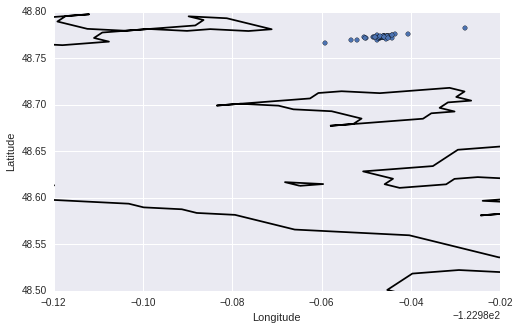

In [6]:
fig,axm = plt.subplots(1,figsize=(8,5))
data_region.plot(x='Longitude',y='Latitude',kind='scatter', marker='o',ax=axm)
viz_tools.plot_coastline(axm,grid_B,coords='map')
axm.set_xlim([lon_min,lon_max])
axm.set_ylim([lat_min, lat_max])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd94d71c150>]], dtype=object)

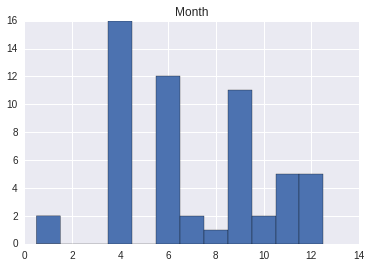

In [7]:
data_region.hist('Month',bins=np.arange(0.5,13.5))

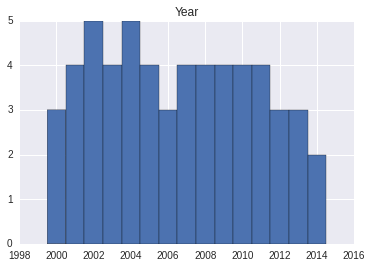

In [8]:
data_region.hist('Year', bins= np.arange(data_region['Year'].min()-0.5, data_region['Year'].max() +1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

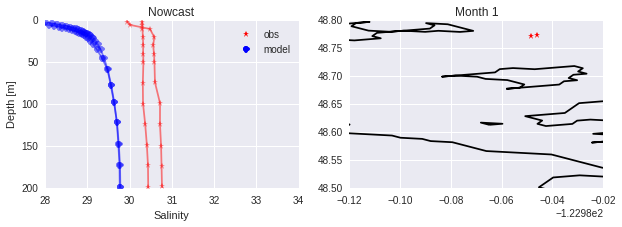

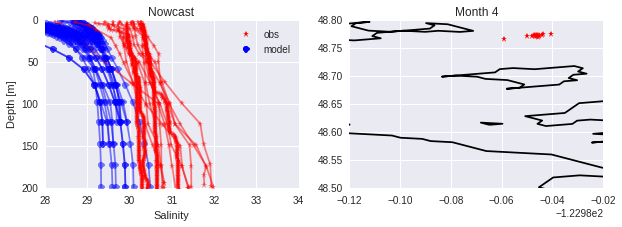

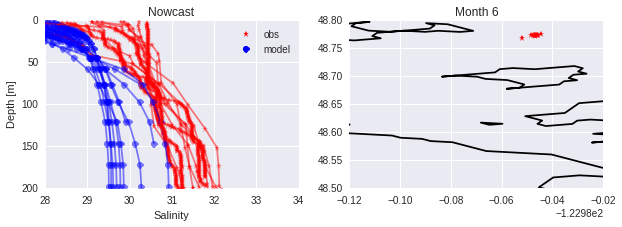

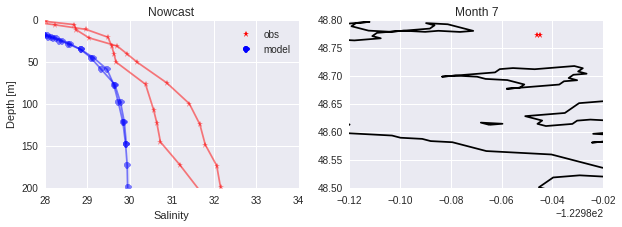

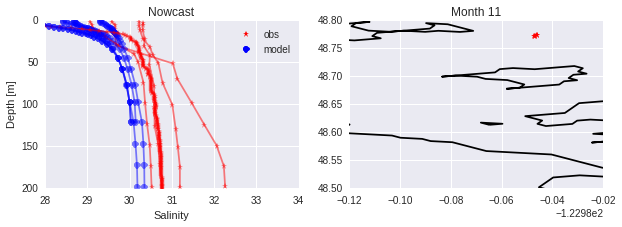

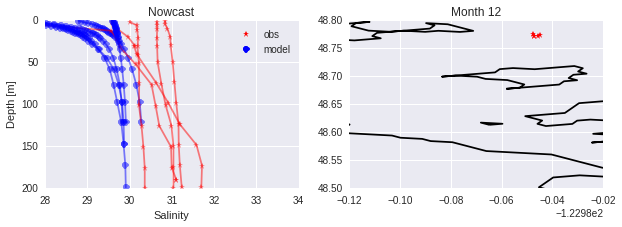

In [9]:
zmax= 200
grouped = data_region.groupby('Month')
for month in grouped.groups.keys():
    if month != 8 and month != 9 and month != 10: 
        if month ==11 or month ==12:
            model_year=2014
        else:
            model_year=2015
        fig = comparisons.compare_model_obs(month,model_year,'Salinity',data_region,paths['nowcast'],zmax=zmax,vmin=28,
                                            vmax=34, xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)

These comparisons are still difficult. Let's separate each cast out. Focus on the eastern Juan de Fuca region.

#Cast by cast comparison, organized by month 


Question - What does the stratification in Boundary Pass look like?

Plot 7 days before and after cast yeardate to attempt to capture spring/neap variability.

###Nowcasts


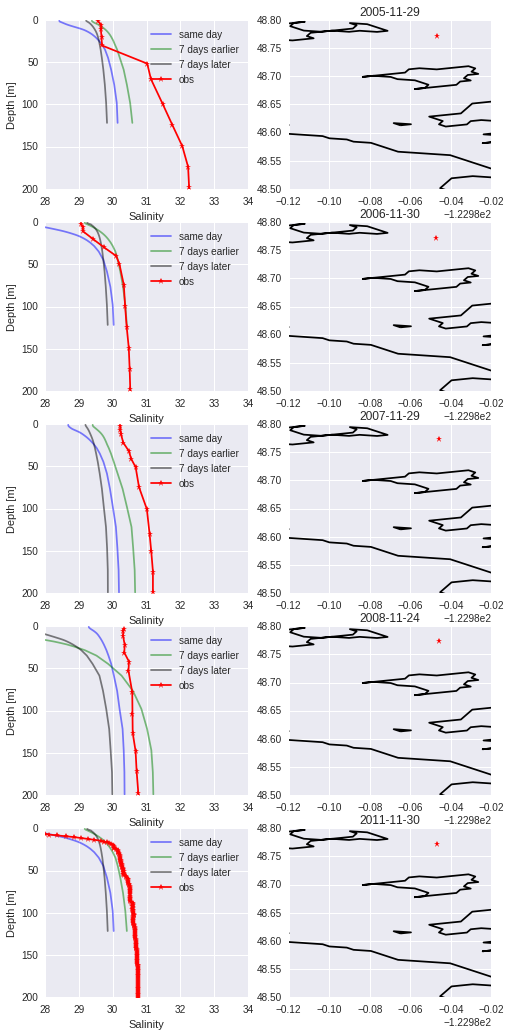

In [10]:
vmin=28
month = 11
fig=comparisons.compare_cast_model(month,2014,'Salinity',data_region,paths['nowcast'],zmax=zmax,vmin=vmin,vmax=34,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)

What is wrong with our depths?

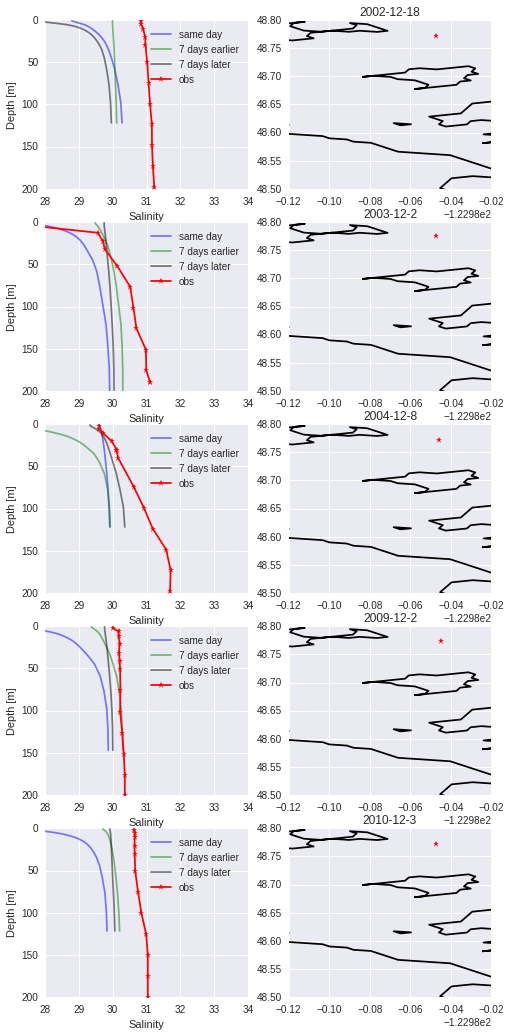

In [11]:
month = 12
fig=comparisons.compare_cast_model(month,2014,'Salinity',data_region,paths['nowcast'],zmax=zmax,vmin=vmin,vmax=34,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)

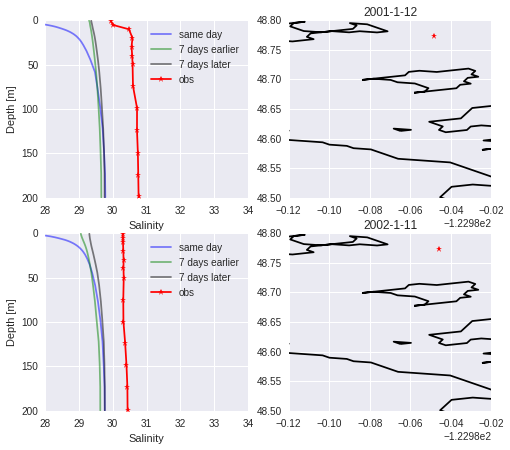

In [12]:
month = 1
fig=comparisons.compare_cast_model(month,2015,'Salinity',data_region,paths['nowcast'],zmax=zmax,vmin=vmin,vmax=34,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)

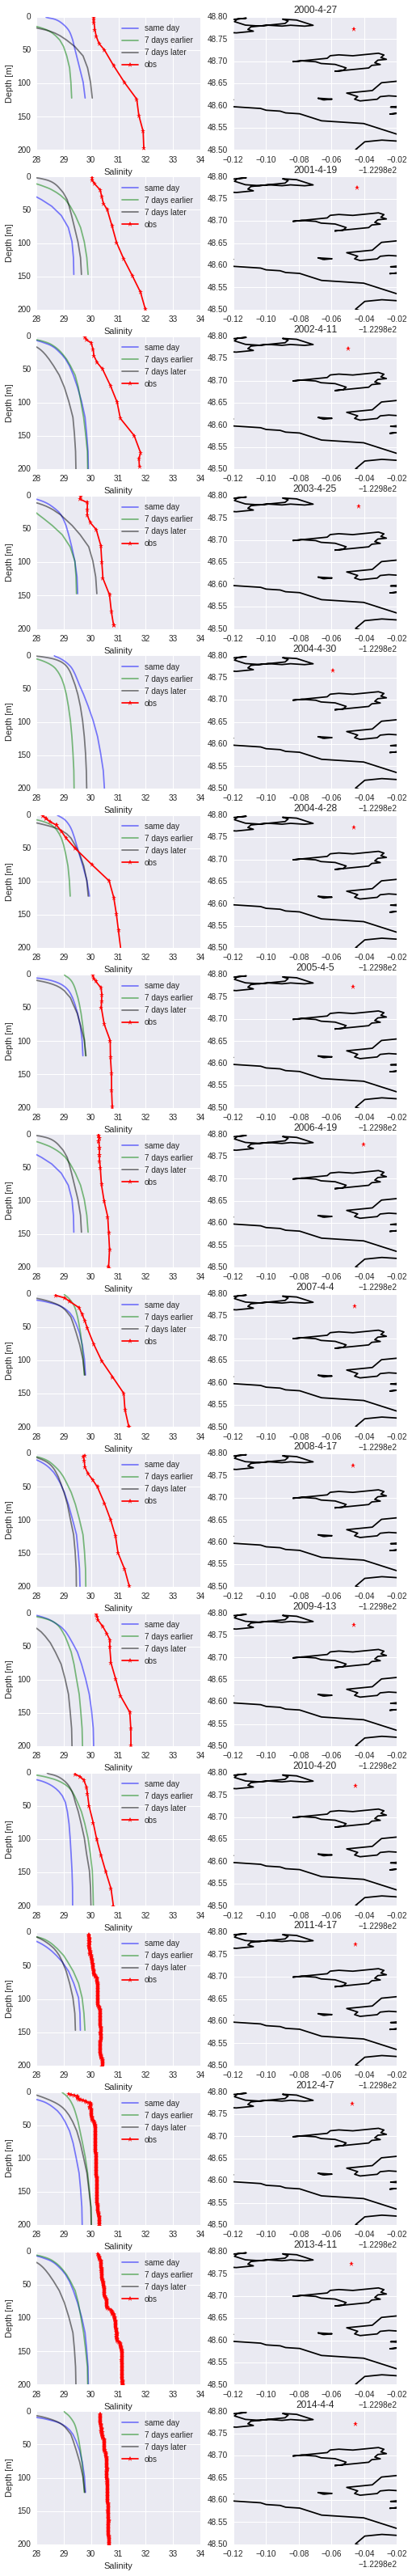

In [13]:
month = 4
fig=comparisons.compare_cast_model(month,2015,'Salinity',data_region,paths['nowcast'],zmax=zmax,vmin=vmin,vmax=34,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)

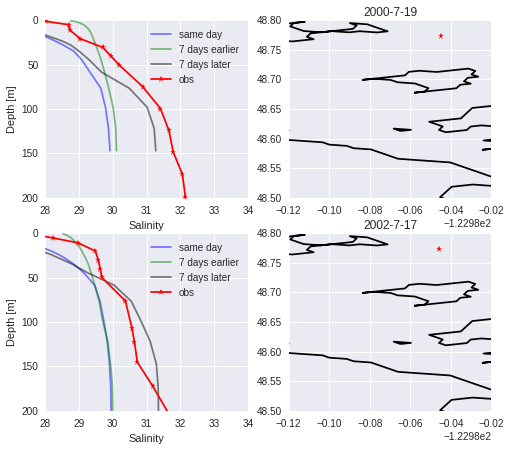

In [14]:
month = 7
fig=comparisons.compare_cast_model(month,2015,'Salinity',data_region,paths['nowcast'],zmax=zmax,vmin=vmin,vmax=34,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)

#Summary


* Model is fresher in almost all comparisons at pretty much all depths. Does this mean that the water entering Haro Strait is too fresh?
* Again, worried about this comparing mode/observations in different years when I know there is a lot of interannual variability in the surface salinity of SoG. 
* Notice how the model is more or less stratified depending on the tidal cycle. 
* There seems to be something strange about our model depths. 
